In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import cufflinks as cf
import plotly.graph_objs as go
import datetime
import sklearn

from chart_studio import plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from pandas_datareader import data, wb
%matplotlib inline

In [37]:
init_notebook_mode(connected=True)

Data Loading

In [38]:
df = pd.read_csv(r".\data\USA_Housing.csv")

In [39]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [41]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [42]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [43]:
df.columns = ['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
            'Avg_Area_Number_of_Bedrooms', 'Area_Population','Price', 'Address']

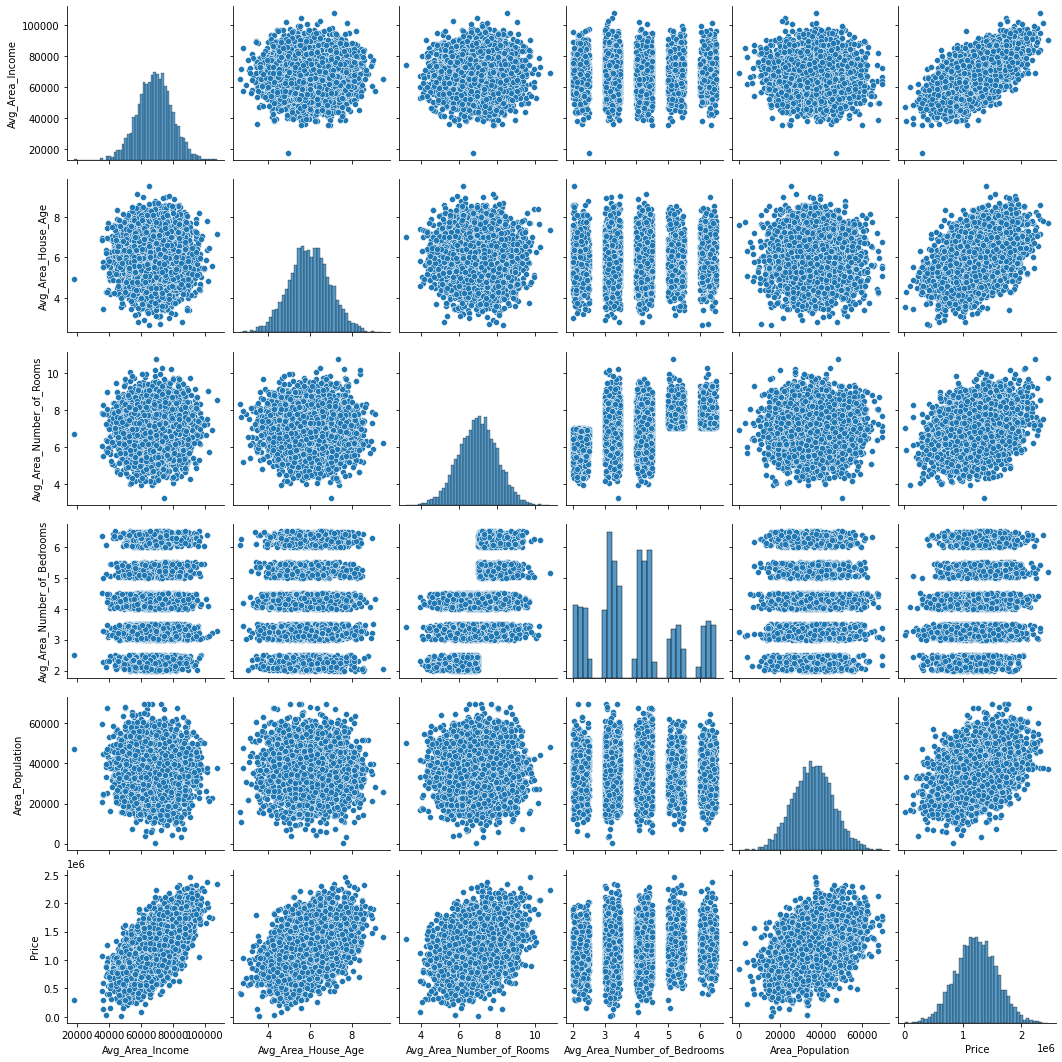

In [44]:
sns.pairplot(df)

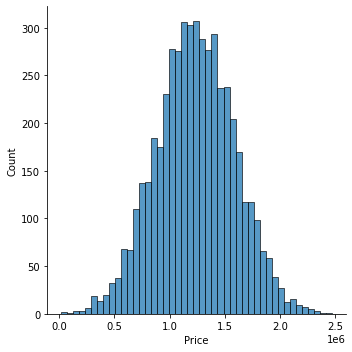

In [45]:
sns.displot(df['Price'])

Feature Selection

In [46]:
df.corr()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price
Avg_Area_Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg_Area_House_Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg_Area_Number_of_Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg_Area_Number_of_Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area_Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<AxesSubplot:>

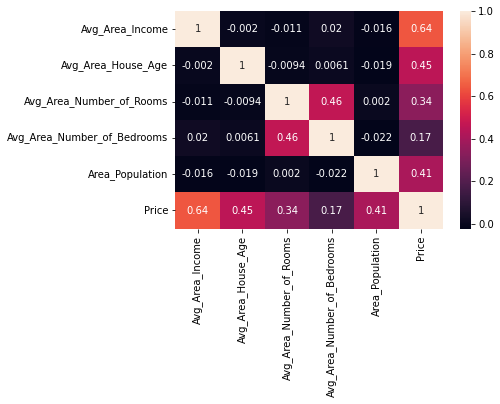

In [47]:
sns.heatmap(df.corr(), annot=True)

In [48]:
feature = df[['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
            'Avg_Area_Number_of_Bedrooms', 'Area_Population','Price', 'Address']]

In [49]:
target = df[['Price']]

In [50]:
feature.drop(columns="Address", inplace=True)

Spliting Data

In [51]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(feature,target, test_size=0.4, random_state=101)

In [52]:
xtrain.shape, xtest.shape

((3000, 6), (2000, 6))

In [53]:
ytrain.shape, xtest.shape

((3000, 1), (2000, 6))

Choosing Model

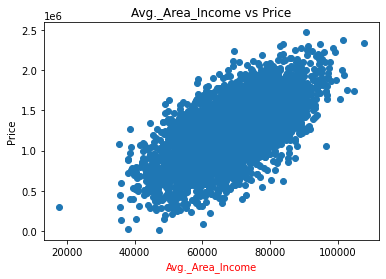

<Figure size 432x288 with 0 Axes>

In [54]:
plt.scatter(feature.Avg_Area_Income ,target.values)
plt.title("Avg._Area_Income vs Price")
plt.xlabel("Avg._Area_Income", color="red")
plt.ylabel("Price")
plt.show()
plt.tight_layout()

Modeling

In [55]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(xtrain, ytrain.values.ravel())

LinearRegression()

In [56]:
print(lm.intercept_)

-2.3283064365386963e-10


In [57]:
lm.coef_

array([3.40030386e-15, 2.68025602e-11, 4.69749639e-11, 3.59878406e-13,
       2.51534904e-17, 1.00000000e+00])

In [58]:
xtrain.columns

Index(['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedrooms', 'Area_Population', 'Price'],
      dtype='object')

In [59]:
cdf = pd.DataFrame(lm.coef_ ,feature.columns,columns=['coeff'])

In [60]:
cdf

,coeff
Avg_Area_Income,3.400304e-15
Avg_Area_House_Age,2.680256e-11
Avg_Area_Number_of_Rooms,4.697496e-11
Avg_Area_Number_of_Bedrooms,3.598784e-13
Area_Population,2.515349e-17
Price,1.000000e+00


Predictions

In [87]:
predictions = lm.predict(xtest)

In [88]:
predictions

array([1251688.61570287,  873048.31964236, 1696977.6628326 , ...,
        151527.08262656, 1343824.21514432, 1906024.63648501])

In [89]:
ytest

,Price
1718,1.251689e+06
2511,8.730483e+05
345,1.696978e+06
2521,1.063964e+06
54,9.487883e+05
...,...
1776,1.489520e+06
4269,7.777336e+05
1661,1.515271e+05
2410,1.343824e+06


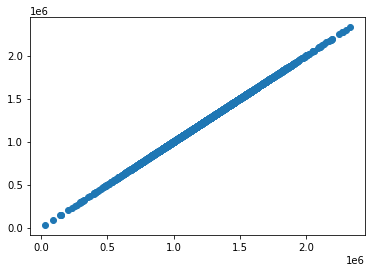

In [90]:
plt.scatter(ytest,predictions)

In [92]:
from sklearn import metrics

In [93]:
metrics.mean_absolute_error(ytest,predictions)

1.0872281563933939e-10

In [94]:
metrics.mean_squared_error(ytest,predictions)

2.601572361985428e-20

In [95]:
metrics.r2_score(ytest,predictions)

1.0

In [96]:
np.sqrt(metrics.mean_squared_error(ytest,predictions))

1.61293904472098e-10